In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("Apps_data.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# Reviews should be made numeric data type.
# Type, Content Rating can be converted to numeric data
# Rating, Type, Content Rating, Current Ver and Android Ver have Null Values
df.info()
print("*"*30)
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
******************************


,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [ ]:
duplicate= df[df.duplicated()]
duplicate.sort_values("App")
#There are 483 rows which are duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [ ]:
df.drop_duplicates(keep="first", inplace=True)
df.shape

(10358, 13)

In [ ]:
df["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
#Dropping the 1.9 Category as it is only 1 value
df= df[df["Category"]!="1.9"]
df.shape

(10357, 13)

In [ ]:
#Category with highest number of apps
df["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


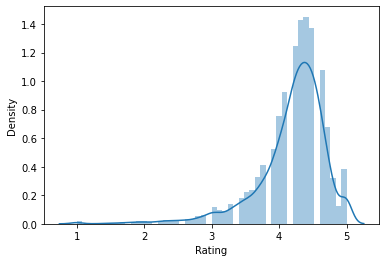

In [ ]:
#Distribution of Rating Column
sns.distplot(df["Rating"])
df["Rating_cat"]=df["Rating"].apply( lambda x: "High" if x>=3.5 else "Low")
df.head()

In [ ]:
#Converting the review column into numeric data type and checking for null values
df["Reviews"]= pd.to_numeric(df["Reviews"])
print(df["Reviews"].dtypes)
print(df["Reviews"].isnull().sum())

int64
0


In [ ]:
#Top 5 apps with highest number of reviews and their respective genre
data = df.groupby(["App","Genres"], as_index=False).agg( Review = ("Reviews",sum))
data.sort_values("Review", ascending=False).head()

,App,Genres,Review
5404,Instagram,Social,199664676
4333,Facebook,Social,156286514
8087,Subway Surfers,Arcade,138606606
9050,WhatsApp Messenger,Communication,138228988
2569,Clash of Clans,Strategy,134667058


In [ ]:
#Making size column numeric
df["Size"]=df["Size"].replace("Varies with device", np.NaN)

df["M_k"]= df["Size"].str.strip().str[-1]
df["Size"]= df["Size"].replace({"M":"", "k":""}, regex= True)
df["M_k"]=df["M_k"].replace({"M":1000000, "k":1000}, regex= True)
df["Size"]=df["Size"].replace("Varies with device", np.NaN)
# df["M_k"]=df["M_k"].replace("e", np.NaN)
df["Size"]=pd.to_numeric(df["Size"])
df["M_k"]=pd.to_numeric(df["M_k"])
df["Size"]=df["Size"]*df["M_k"]
df=df.drop("M_k",axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [ ]:
#Converting Installs column into numeric data type and removing mentioned values
df["Installs"].unique()
df["Installs"]=df["Installs"].replace({",":""}, regex= True)
df['Installs'] = df['Installs'].map(lambda x: str(x)[:-1])
df["Installs"]= df["Installs"].replace("","0")
df["Installs"]= pd.to_numeric(df["Installs"])
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
221,Myanmar 2D/3D,BUSINESS,4.6,822,3100000.0,100000,Free,0,Everyone,Business,"June 8, 2018",1.5,4.0.3 and up,High
5980,BC Camera,PHOTOGRAPHY,4.2,5,5500000.0,500,Free,0,Everyone,Photography,"January 10, 2018",1.0,4.0.3 and up,High
8793,Dr. Seuss's ABC,FAMILY,4.7,429,12000000.0,10000,Paid,$3.99,Everyone,Books & Reference;Education,"February 26, 2018",2.05,4.0.3 and up,High
8659,Cal - Google Calendar + Widget,PRODUCTIVITY,4.2,86172,13000000.0,1000000,Free,0,Everyone,Productivity,"February 1, 2016",1.1.7,4.0 and up,High
8555,Dungeons and Dragons DM Tools,BOOKS_AND_REFERENCE,3.1,50,4900000.0,1000,Paid,$1.99,Everyone,Books & Reference,"February 22, 2017",2.0,2.3 and up,Low


In [ ]:
x= df["Type"].value_counts()
print(x)
print( "Percentage of Paid Apps", round((x[1]/(x[0]+x[1]))*100,2),"%")

Free    9591
Paid     765
Name: Type, dtype: int64
Percentage of Paid Apps 7.39 %


In [ ]:
#Converting price column into numeric data type
df["Price"]=df["Price"].replace("0","$0")
df["Price"]=df["Price"].str[1:]
df["Price"]= pd.to_numeric(df["Price"])

In [ ]:
#Most Expensive App
df.sort_values("Price", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,High


In [ ]:
df["Content Rating"].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
#Dropping columns which can't be used for modelling
df.drop(["App","Genres","Content Rating","Last Updated", "Android Ver", "Current Ver"], axis=1,inplace=True)
df= pd.get_dummies(df, columns=["Type", "Category"])
rating_cat={"High":1, "Low":0}
df["Rating_cat"]=df["Rating_cat"].map(rating_cat)
df.head()

,Rating,Reviews,Size,Installs,Price,Rating_cat,Type_Free,Type_Paid,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Missing Values with Median
df=df.fillna(df.median())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating training and test datasets
Y=df["Rating_cat"]
X=df.drop(["Rating_cat"], axis=1)

X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier( criterion="gini", max_depth=10, max_features=15)
dt.fit(X_train,y_train)
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print("Train score",dt.score(X_train, y_train))
print("Test score",dt.score(X_test, y_test))

[[ 603   38]
 [  57 2410]]
Train score 0.9799972409987584
Test score 0.9694337194337195


In [ ]:
pd.Series(dt.feature_importances_, index = X_train.columns)

Rating                          0.499964
Reviews                         0.456116
Size                            0.017703
Installs                        0.004853
Price                           0.002052
Type_Free                       0.001332
Type_Paid                       0.000000
Category_ART_AND_DESIGN         0.000000
Category_AUTO_AND_VEHICLES      0.000577
Category_BEAUTY                 0.000642
Category_BOOKS_AND_REFERENCE    0.000000
Category_BUSINESS               0.001259
Category_COMICS                 0.000325
Category_COMMUNICATION          0.000592
Category_DATING                 0.000000
Category_EDUCATION              0.000000
Category_ENTERTAINMENT          0.000000
Category_EVENTS                 0.000424
Category_FAMILY                 0.000000
Category_FINANCE                0.000605
Category_FOOD_AND_DRINK         0.001212
Category_GAME                   0.000106
Category_HEALTH_AND_FITNESS     0.000000
Category_HOUSE_AND_HOME         0.000000
Category_LIBRARI

Random Forest Model

In [ ]:
#Random Forest Model
rf = RandomForestRegressor(max_depth=8)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [ ]:
print("Train score",rf.score(X_train, y_train))
print("Test score",rf.score(X_test, y_test))

Train score 0.9571419489469944
Test score 0.9429241492901314


The models fits the data pretty well in the test case.

In [ ]:
pd.Series(rf.feature_importances_, index = X_train.columns)

Rating                          0.565714
Reviews                         0.414944
Size                            0.007545
Installs                        0.002858
Price                           0.001917
Type_Free                       0.000029
Type_Paid                       0.000062
Category_ART_AND_DESIGN         0.000000
Category_AUTO_AND_VEHICLES      0.000043
Category_BEAUTY                 0.000428
Category_BOOKS_AND_REFERENCE    0.000194
Category_BUSINESS               0.000077
Category_COMICS                 0.000048
Category_COMMUNICATION          0.000007
Category_DATING                 0.000240
Category_EDUCATION              0.000000
Category_ENTERTAINMENT          0.000000
Category_EVENTS                 0.000232
Category_FAMILY                 0.000474
Category_FINANCE                0.000097
Category_FOOD_AND_DRINK         0.000193
Category_GAME                   0.000134
Category_HEALTH_AND_FITNESS     0.000006
Category_HOUSE_AND_HOME         0.000010
Category_LIBRARI

**Gradient Boosting Classifier**

In [ ]:
#Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train,y_train)
y_test_pred = gbc.predict(X_test)
y_train_pred = gbc.predict(X_train)

In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print("Train score",gbc.score(X_train, y_train))
print("Test score",gbc.score(X_test, y_test))

[[ 626   15]
 [  25 2442]]
Train score 0.9885501448475652
Test score 0.9871299871299871


Gradient Boosting also gave a very well model.

In [ ]:
pd.Series(gbc.feature_importances_, index = X_train.columns)

Rating                          0.478610
Reviews                         0.518486
Size                            0.000213
Installs                        0.000194
Price                           0.000151
Type_Free                       0.000000
Type_Paid                       0.000000
Category_ART_AND_DESIGN         0.000000
Category_AUTO_AND_VEHICLES      0.000000
Category_BEAUTY                 0.000421
Category_BOOKS_AND_REFERENCE    0.000000
Category_BUSINESS               0.000000
Category_COMICS                 0.000000
Category_COMMUNICATION          0.000000
Category_DATING                 0.000000
Category_EDUCATION              0.000000
Category_ENTERTAINMENT          0.000000
Category_EVENTS                 0.000124
Category_FAMILY                 0.000000
Category_FINANCE                0.000000
Category_FOOD_AND_DRINK         0.000053
Category_GAME                   0.000000
Category_HEALTH_AND_FITNESS     0.000000
Category_HOUSE_AND_HOME         0.000000
Category_LIBRARI

**Stacking Classifier**

In [ ]:
estimators = [('Lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=7)),('rf', RandomForestClassifier(n_estimators=50, random_state=42))]
sc = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression() )
sc.fit(X_train,y_train)
y_test_pred = sc.predict(X_test)
y_train_pred = sc.predict(X_train)

In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print("Train score",sc.score(X_train, y_train))
print("Test score",sc.score(X_test, y_test))

[[ 621   20]
 [  26 2441]]
Train score 0.9957235480755966
Test score 0.9851994851994852
